# NFL Combine Data Analysis - RB

## Kevin Petruzzelli

#### Import Libraries

In [579]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import sklearn

#### Load Combine Data that will be used in the analysis

In [580]:
df_combine = pd.read_csv("Combine_Data.csv")
print df_combine.isnull().sum().sort_values(ascending=False) 

print("Combine Data Shape", df_combine.shape)

Unnamed: 27          4945
Unnamed: 26          4945
pick                 1789
college              1470
picktotal               2
fortyyd                 0
name                    0
firstname               0
lastname                0
position                0
heightfeet              0
heightinches            0
heightinchestotal       0
weight                  0
arms                    0
hands                   0
tenyd                   0
twentyyd                0
twentyss                0
threecone               0
vertical                0
broad                   0
bench                   0
round                   0
pickround               0
wonderlic               0
nflgrade                0
year                    0
dtype: int64
('Combine Data Shape', (4947, 28))


#### Drop Uneccessary Columns and View Data

In [581]:
df_combine.drop(['Unnamed: 26', 'Unnamed: 27'], axis = 1, inplace = True)
df_combine = df_combine.convert_objects(convert_numeric=True)
df_combine = df_combine.replace(0,df_combine.mean())
df_combine.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,vertical,broad,bench,round,college,pick,pickround,picktotal,wonderlic,nflgrade
0,2015,"Abdullah, Ameer",Ameer,Abdullah,RB,5.0,9.000000,69.0,205,7.670564,...,42.50,130.0,24.0,2.482313,NaN,NaN,11.323559,71.908595,1.144532,5.9
1,2015,"Agholor, Nelson",Nelson,Agholor,WR,6.0,4.371992,72.0,198,7.670564,...,35.54,120.0,12.0,2.482313,NaN,NaN,11.323559,71.908595,1.144532,5.6
2,2015,"Ajayi, Jay",Jay,Ajayi,RB,6.0,4.371992,72.0,221,7.670564,...,39.00,121.0,19.0,2.482313,NaN,NaN,11.323559,71.908595,1.144532,6.0
3,2015,"Alexander, Kwon",Kwon,Alexander,OLB,6.0,1.000000,73.0,227,7.670564,...,36.00,121.0,24.0,2.482313,NaN,NaN,11.323559,71.908595,1.144532,5.4
4,2015,"Alford, Mario",Mario,Alford,WR,5.0,8.000000,68.0,180,7.670564,...,34.00,121.0,13.0,2.482313,NaN,NaN,11.323559,71.908595,1.144532,5.3


In [582]:
df_combine.fillna(df_combine.mean())

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,vertical,broad,bench,round,college,pick,pickround,picktotal,wonderlic,nflgrade
0,2015,"Abdullah, Ameer",Ameer,Abdullah,RB,5.0,9.000000,69.0,205,7.670564,...,42.500000,130.000000,24.000000,2.482313,25.5,0.0,11.323559,71.908595,1.144532,5.900000
1,2015,"Agholor, Nelson",Nelson,Agholor,WR,6.0,4.371992,72.0,198,7.670564,...,35.540000,120.000000,12.000000,2.482313,25.5,0.0,11.323559,71.908595,1.144532,5.600000
2,2015,"Ajayi, Jay",Jay,Ajayi,RB,6.0,4.371992,72.0,221,7.670564,...,39.000000,121.000000,19.000000,2.482313,25.5,0.0,11.323559,71.908595,1.144532,6.000000
3,2015,"Alexander, Kwon",Kwon,Alexander,OLB,6.0,1.000000,73.0,227,7.670564,...,36.000000,121.000000,24.000000,2.482313,25.5,0.0,11.323559,71.908595,1.144532,5.400000
4,2015,"Alford, Mario",Mario,Alford,WR,5.0,8.000000,68.0,180,7.670564,...,34.000000,121.000000,13.000000,2.482313,25.5,0.0,11.323559,71.908595,1.144532,5.300000
5,2015,"Allen, Javorius",Javorius,Allen,RB,6.0,4.371992,72.0,221,7.670564,...,35.500000,121.000000,11.000000,2.482313,25.5,0.0,11.323559,71.908595,1.144532,5.300000
6,2015,"Amos, Adrian",Adrian,Amos,FS,6.0,4.371992,72.0,218,7.670564,...,35.500000,122.000000,18.103699,2.482313,25.5,0.0,11.323559,71.908595,1.144532,5.500000
7,2015,"Anderson, Dres",Dres,Anderson,WR,6.0,1.000000,73.0,187,7.670564,...,35.540000,120.000000,13.000000,2.482313,25.5,0.0,11.323559,71.908595,1.144532,5.500000
8,2015,"Anderson, Henry",Henry,Anderson,DE,6.0,6.000000,78.0,294,7.670564,...,30.000000,111.000000,18.103699,2.482313,25.5,0.0,11.323559,71.908595,1.144532,5.600000
9,2015,"Anderson, Rory 'Busta'",Rory 'Busta',Anderson,TE,6.0,5.000000,77.0,244,7.670564,...,29.597305,100.149755,18.103699,2.482313,25.5,0.0,11.323559,71.908595,1.144532,5.500000


#### Create combine dataframe by position

In [583]:
df_wr_combine = df_combine.ix[df_combine['position'] == 'WR']
df_rb_combine = df_combine.ix[df_combine['position'] == 'RB']
df_qb_combine = df_combine.ix[df_combine['position'] == 'QB']

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [584]:
df_rb_combine.fillna(df_rb_combine.mean())
df_rb_combine.head()

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,vertical,broad,bench,round,college,pick,pickround,picktotal,wonderlic,nflgrade
0,2015,"Abdullah, Ameer",Ameer,Abdullah,RB,5.0,9.000000,69.0,205,7.670564,...,42.50,130.0,24.0,2.482313,NaN,NaN,11.323559,71.908595,1.144532,5.9
2,2015,"Ajayi, Jay",Jay,Ajayi,RB,6.0,4.371992,72.0,221,7.670564,...,39.00,121.0,19.0,2.482313,NaN,NaN,11.323559,71.908595,1.144532,6.0
5,2015,"Allen, Javorius",Javorius,Allen,RB,6.0,4.371992,72.0,221,7.670564,...,35.50,121.0,11.0,2.482313,NaN,NaN,11.323559,71.908595,1.144532,5.3
12,2015,"Artis-Payne, Cameron",Cameron,Artis-Payne,RB,5.0,10.000000,70.0,212,7.670564,...,36.50,118.0,20.0,2.482313,NaN,NaN,11.323559,71.908595,1.144532,5.4
31,2015,"Brown, Dominique",Dominique,Brown,RB,6.0,2.000000,74.0,234,7.670564,...,34.63,117.0,17.0,2.482313,NaN,NaN,11.323559,71.908595,1.144532,5.0


In [585]:
df_rb_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 0 to 4946
Data columns (total 26 columns):
year                 455 non-null int64
name                 455 non-null object
firstname            455 non-null object
lastname             455 non-null object
position             455 non-null object
heightfeet           455 non-null float64
heightinches         455 non-null float64
heightinchestotal    455 non-null float64
weight               455 non-null int64
arms                 455 non-null float64
hands                455 non-null float64
fortyyd              455 non-null float64
twentyyd             455 non-null float64
tenyd                455 non-null float64
twentyss             455 non-null float64
threecone            455 non-null float64
vertical             455 non-null float64
broad                455 non-null float64
bench                455 non-null float64
round                455 non-null float64
college              0 non-null float64
pick                 3

#### Identify time period of data

In [586]:
print("Min year of data", df_combine.year.min())
print("Max year of data", df_combine.year.max())

('Min year of data', 1999)
('Max year of data', 2015)


#### Load  running back data

In [587]:
df_rushing = pd.read_csv("Career_Stats_Rushing.csv")
print df_rushing.isnull().sum().sort_values(ascending=False) 

print("Rushing Data Shape", df_rushing.shape)

Position                             15188
Fumbles                                  0
Rushing More Than 40 Yards               0
Name                                     0
Year                                     0
Team                                     0
Games Played                             0
Rushing Attempts                         0
Rushing Attempts Per Game                0
Rushing Yards                            0
Yards Per Carry                          0
Rushing Yards Per Game                   0
Rushing TDs                              0
Longest Rushing Run                      0
Rushing First Downs                      0
Percentage of Rushing First Downs        0
Rushing More Than 20 Yards               0
Player Id                                0
dtype: int64
('Rushing Data Shape', (17507, 18))


In [588]:
df_rushing.head()

,Player Id,Name,Position,Year,Team,Games Played,Rushing Attempts,Rushing Attempts Per Game,Rushing Yards,Yards Per Carry,Rushing Yards Per Game,Rushing TDs,Longest Rushing Run,Rushing First Downs,Percentage of Rushing First Downs,Rushing More Than 20 Yards,Rushing More Than 40 Yards,Fumbles
0,fredevans/2513736,"Evans, Fred",NaN,1948,Chicago Bears,3,10,3.3,15,1.5,5.0,0,--,--,--,--,--,--
1,fredevans/2513736,"Evans, Fred",NaN,1948,Chicago Rockets,0,--,0.0,--,--,--,--,--,--,--,--,--,--
2,fredevans/2513736,"Evans, Fred",NaN,1947,Chicago Rockets,0,--,0.0,--,--,--,--,--,--,--,--,--,--
3,fredevans/2513736,"Evans, Fred",NaN,1947,Buffalo Bills,0,--,0.0,--,--,--,--,--,--,--,--,--,--
4,fredevans/2513736,"Evans, Fred",NaN,1946,Cleveland Browns,0,--,0.0,--,--,--,--,--,--,--,--,--,--


#### Remove data that exists in years outside of our combine data set

In [589]:
print ("Count of rows prior to drop",df_rushing['Year'].count())
df_rushing = df_rushing.drop(df_rushing[df_rushing.Year < 1999].index)
df_rushing = df_rushing.drop(df_rushing[df_rushing.Year > 2015].index)
#df_rushing = df_rushing.drop(df_rushing[df_rushing['Games Played'] < 8].index)
print ("Count of rows post drop",df_rushing['Year'].count())

('Count of rows prior to drop', 17507)
('Count of rows post drop', 5516)


#### Clean receiving data

In [590]:
df_rushing.columns = df_rushing.columns.str.strip()
df_rushing.replace({'--': np.NaN}, regex=True)
df_rushing = df_rushing.convert_objects(convert_numeric=True)
df_rushing.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


,Player Id,Name,Position,Year,Team,Games Played,Rushing Attempts,Rushing Attempts Per Game,Rushing Yards,Yards Per Carry,Rushing Yards Per Game,Rushing TDs,Longest Rushing Run,Rushing First Downs,Percentage of Rushing First Downs,Rushing More Than 20 Yards,Rushing More Than 40 Yards,Fumbles
6,quinnjohnson/79593,"Johnson, Quinn",NaN,2013,Tennessee Titans,4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,quinnjohnson/79593,"Johnson, Quinn",NaN,2012,Tennessee Titans,16,4.0,0.2,5.0,1.3,0.3,0.0,3.0,2.0,50.0,0.0,0.0,0.0
8,quinnjohnson/79593,"Johnson, Quinn",NaN,2011,Tennessee Titans,4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,quinnjohnson/79593,"Johnson, Quinn",NaN,2011,Denver Broncos,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,quinnjohnson/79593,"Johnson, Quinn",NaN,2010,Green Bay Packers,11,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Create average receiving yards and average touchdowns per season data set

In [591]:
df_rushingyds_mean = df_rushing.groupby('Name', as_index=False)[['Rushing Yards','Rushing TDs']].mean()
df_rushingyds_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 0 to 1087
Data columns (total 3 columns):
Name             1088 non-null object
Rushing Yards    1006 non-null float64
Rushing TDs      1007 non-null float64
dtypes: float64(2), object(1)
memory usage: 34.0+ KB


In [592]:
df_rushingyds_mean.columns

Index([u'Name', u'Rushing Yards', u'Rushing TDs'], dtype='object')

In [593]:
df_rushingyds_mean = df_rushingyds_mean.convert_objects(convert_numeric=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [594]:
#df_rushingyds_mean.fillna(df_rushingyds_mean.mean())
df_rushingyds_mean.fillna(0)

,Name,Rushing Yards,Rushing TDs
0,"Abdul-Quddus, Isa",34.000000,0.000000
1,"Abdullah, Ameer",597.000000,2.000000
2,"Abdullah, Rabih",34.400000,0.200000
3,"Adams, Charlie",14.000000,0.000000
4,"Adams, Joe",13.000000,0.000000
5,"Addai, Joseph",575.000000,6.500000
6,"Agholor, Nelson",0.000000,0.000000
7,"Agnew, Ray",2.000000,0.000000
8,"Aguiar, Louie",0.000000,0.000000
9,"Aikman, Troy",11.500000,0.500000


In [595]:
df_rushingyds_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 0 to 1087
Data columns (total 3 columns):
Name             1088 non-null object
Rushing Yards    1006 non-null float64
Rushing TDs      1007 non-null float64
dtypes: float64(2), object(1)
memory usage: 34.0+ KB


#### Join rushing data to combine data

In [596]:
df_rushingyds_mean.rename(columns={'Name': 'RBName', 'Rushing Yards': 'SeasonAvgRushYds', 'Rushing TDs':'SeasonAvgRushTDs'}, inplace=True)

In [597]:
df_rb_clean = df_rb_combine.merge(df_rushingyds_mean, left_on='name', right_on='RBName', how='left')

In [598]:
df_rb_clean.fillna(df_rb_clean.mean())
#df_rb_clean.fillna(0)
df_rb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 0 to 454
Data columns (total 29 columns):
year                 455 non-null int64
name                 455 non-null object
firstname            455 non-null object
lastname             455 non-null object
position             455 non-null object
heightfeet           455 non-null float64
heightinches         455 non-null float64
heightinchestotal    455 non-null float64
weight               455 non-null int64
arms                 455 non-null float64
hands                455 non-null float64
fortyyd              455 non-null float64
twentyyd             455 non-null float64
tenyd                455 non-null float64
twentyss             455 non-null float64
threecone            455 non-null float64
vertical             455 non-null float64
broad                455 non-null float64
bench                455 non-null float64
round                455 non-null float64
college              0 non-null float64
pick                 33

In [599]:
df_rb_clean.head(10)

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,round,college,pick,pickround,picktotal,wonderlic,nflgrade,RBName,SeasonAvgRushYds,SeasonAvgRushTDs
0,2015,"Abdullah, Ameer",Ameer,Abdullah,RB,5.0,9.000000,69.0,205,7.670564,...,2.482313,NaN,NaN,11.323559,71.908595,1.144532,5.9,"Abdullah, Ameer",597.0,2.0
1,2015,"Ajayi, Jay",Jay,Ajayi,RB,6.0,4.371992,72.0,221,7.670564,...,2.482313,NaN,NaN,11.323559,71.908595,1.144532,6.0,"Ajayi, Jay",187.0,1.0
2,2015,"Allen, Javorius",Javorius,Allen,RB,6.0,4.371992,72.0,221,7.670564,...,2.482313,NaN,NaN,11.323559,71.908595,1.144532,5.3,"Allen, Javorius",514.0,1.0
3,2015,"Artis-Payne, Cameron",Cameron,Artis-Payne,RB,5.0,10.000000,70.0,212,7.670564,...,2.482313,NaN,NaN,11.323559,71.908595,1.144532,5.4,"Artis-Payne, Cameron",183.0,1.0
4,2015,"Brown, Dominique",Dominique,Brown,RB,6.0,2.000000,74.0,234,7.670564,...,2.482313,NaN,NaN,11.323559,71.908595,1.144532,5.0,NaN,NaN,NaN
5,2015,"Brown, Malcolm",Malcolm,Brown,RB,5.0,11.000000,71.0,224,7.670564,...,2.482313,NaN,NaN,11.323559,71.908595,1.144532,5.2,"Brown, Malcolm",17.0,0.0
6,2015,"Catalon, B.J.",B.J.,Catalon,RB,5.0,7.000000,67.0,186,7.670564,...,2.482313,NaN,NaN,11.323559,71.908595,1.144532,5.1,NaN,NaN,NaN
7,2015,"Cobb, David",David,Cobb,RB,5.0,11.000000,71.0,229,7.670564,...,2.482313,NaN,NaN,11.323559,71.908595,1.144532,5.5,NaN,NaN,NaN
8,2015,"Coleman, Tevin",Tevin,Coleman,RB,5.0,11.000000,71.0,206,7.670564,...,2.482313,NaN,NaN,11.323559,71.908595,1.144532,6.1,"Coleman, Tevin",392.0,1.0
9,2015,"Crockett, John",John,Crockett,RB,6.0,4.371992,72.0,217,7.670564,...,2.482313,NaN,NaN,11.323559,71.908595,1.144532,5.2,NaN,NaN,NaN


#### Explore variable correlations

                    fortyyd  threecone  vertical     bench     broad  \
fortyyd            1.000000   0.146177 -0.360286 -0.075479 -0.431963   
threecone          0.146177   1.000000 -0.090145 -0.057384 -0.155219   
vertical          -0.360286  -0.090145  1.000000  0.094100  0.596211   
bench             -0.075479  -0.057384  0.094100  1.000000  0.116935   
broad             -0.431963  -0.155219  0.596211  0.116935  1.000000   
heightinchestotal  0.091361   0.025893  0.058901  0.012076  0.064003   
weight             0.315343   0.100534 -0.000596  0.255286 -0.072451   

                   heightinchestotal    weight  
fortyyd                     0.091361  0.315343  
threecone                   0.025893  0.100534  
vertical                    0.058901 -0.000596  
bench                       0.012076  0.255286  
broad                       0.064003 -0.072451  
heightinchestotal           1.000000  0.556064  
weight                      0.556064  1.000000  


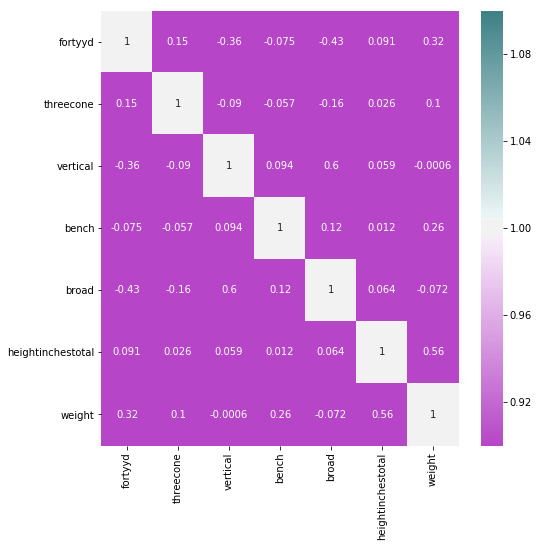

In [600]:
import seaborn as sns

plt.figure(figsize=(8,8))
cmap = sns.diverging_palette(300, 200, as_cmap=True)

correlations = df_rb_clean[['fortyyd', 'threecone', 'vertical', 'bench','broad', 'heightinchestotal', 'weight']].corr()
print(correlations)
sns.heatmap(correlations, cmap=cmap, vmin = 1, vmax = 1, annot = True)


In [601]:
df_rb_clean = df_rb_clean[np.isfinite(df_rb_clean['SeasonAvgRushYds'])]
df_rb_clean = df_rb_clean[np.isfinite(df_rb_clean['SeasonAvgRushTDs'])]
df_rb_clean.head(1)

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,round,college,pick,pickround,picktotal,wonderlic,nflgrade,RBName,SeasonAvgRushYds,SeasonAvgRushTDs
0,2015,"Abdullah, Ameer",Ameer,Abdullah,RB,5.0,9.0,69.0,205,7.670564,...,2.482313,NaN,NaN,11.323559,71.908595,1.144532,5.9,"Abdullah, Ameer",597.0,2.0


#### Create RB regression models

In [602]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
rb_yd_lm = LinearRegression()
rb_yd_lm_lasso = Lasso()
rb_yd_lm_ridge = Ridge()

#### Create target and predictor variables

In [603]:
X = df_rb_clean[['fortyyd', 'threecone', 'vertical', 'bench','broad', 'heightinchestotal', 'weight']]
y = df_rb_clean[['SeasonAvgRushYds']]

In [604]:
import statsmodels.api as sm

model = sm.OLS(y,X)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:       SeasonAvgRushYds   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     46.89
Date:                Tue, 20 Mar 2018   Prob (F-statistic):           4.73e-37
Time:                        10:36:10   Log-Likelihood:                -1237.7
No. Observations:                 183   AIC:                             2489.
Df Residuals:                     176   BIC:                             2512.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
fortyyd            -436.3435    140.90

#### Split train and test data sets

In [605]:
import sklearn.cross_validation 
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y,test_size = 0.30, random_state = 5)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(128, 7)
(55, 7)
(128, 1)
(55, 1)


#### Fit the models to train data

In [606]:
rb_yd_lm.fit(X_train,y_train)
rb_yd_lm_lasso.fit(X_train,y_train)
rb_yd_lm_ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [607]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

y_predict = rb_yd_lm.predict(X_test)

print mean_squared_error(y_predict, y_test)

print rb_yd_lm.score(X_test,y_test)
print rb_yd_lm.score(X_train,y_train)

30517.4338182
-0.10389302073
0.133590951053


#### Check for regularization model improvement

In [608]:
y_predict = rb_yd_lm_lasso.predict(X_test)

print mean_squared_error(y_predict, y_test)

print rb_yd_lm_lasso.score(X_test,y_test)

30830.3815379
-0.115213133872


In [609]:
y_predict = rb_yd_lm_ridge.predict(X_test)

print mean_squared_error(y_test, y_predict)

print rb_yd_lm_ridge.score(X_test,y_test)

31691.5721328
-0.146364583001


In [610]:
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, rb_yd_lm.coef_[0][idx]))

The coefficient for fortyyd is -516.464531873
The coefficient for threecone is -10.913611162
The coefficient for vertical is -0.765346687412
The coefficient for bench is -5.81686662304
The coefficient for broad is 4.003266992
The coefficient for heightinchestotal is 5.05460902011
The coefficient for weight is 5.71224133358


In [611]:
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, rb_yd_lm_ridge.coef_[0][idx]))

The coefficient for fortyyd is -274.090175625
The coefficient for threecone is 7.21513449236
The coefficient for vertical is 1.36299868068
The coefficient for bench is -5.50943663049
The coefficient for broad is 5.46322166921
The coefficient for heightinchestotal is 6.94216713373
The coefficient for weight is 4.91796817925


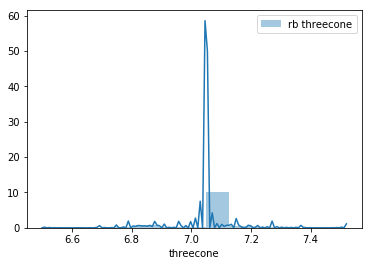

In [623]:
sns.distplot(df_rb_clean['threecone'], label="rb threecone")
plt.legend()

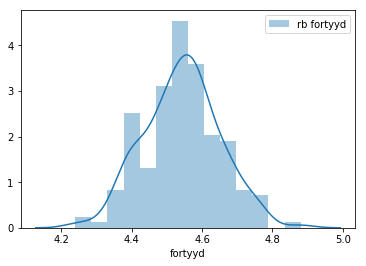

In [624]:
sns.distplot(df_rb_clean['fortyyd'], label="rb fortyyd")
plt.legend()

#### SAQUON BARKLEY Yds. Prediction: Top 2018 RB Prospect

In [613]:
print df_rb_clean.threecone.mean()
print df_rb_clean.broad.mean()

7.04021857923
118.579234973


In [614]:
d = {'fortyyd': [4.40], 'threecone': [1.672], 'vertical': [41], 'bench': [29],
     'broad': [100.678], 'heightinchestotal': [72],'weight': [233]}
df = pd.DataFrame(data=d)
df

y_predict = rb_yd_lm.predict(df)
print y_predict

[[-14165.77662215]]


#### Repeat model creation for TD target

In [615]:
rb_td_lm = LinearRegression()
rb_td_lm_lasso = Lasso()
rb_td_lm_ridge = Ridge()

In [616]:
X = df_rb_clean[['fortyyd', 'threecone', 'vertical', 'bench','broad','heightinchestotal','weight']]
y = df_rb_clean[['SeasonAvgRushTDs']]

In [617]:
model = sm.OLS(y,X)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:       SeasonAvgRushTDs   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     25.51
Date:                Tue, 20 Mar 2018   Prob (F-statistic):           7.19e-24
Time:                        10:36:11   Log-Likelihood:                -411.27
No. Observations:                 183   AIC:                             836.5
Df Residuals:                     176   BIC:                             859.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
fortyyd              -4.0710      1.54

In [618]:
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y,test_size = 0.30, random_state = 5)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(128, 7)
(55, 7)
(128, 1)
(55, 1)


In [619]:
rb_td_lm.fit(X_train,y_train)
rb_td_lm_lasso.fit(X_train,y_train)
rb_td_lm_ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [620]:
print rb_td_lm.score(X_test, y_test)
print rb_td_lm_lasso.score(X_test, y_test)
print rb_td_lm_ridge.score(X_test, y_test)

0.039729872155
0.0362833697534
0.00857212689862


In [621]:
print "Linear Regression"
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, rb_td_lm.coef_[0][idx]))

Linear Regression
The coefficient for fortyyd is -5.51604143666
The coefficient for threecone is -2.21817349562
The coefficient for vertical is 0.067808769347
The coefficient for bench is -0.0203942880456
The coefficient for broad is -0.0755118404238
The coefficient for heightinchestotal is 0.0101875596013
The coefficient for weight is 0.0603775539578


#### SAQUON BARKLEY TDs. Prediction: Top 2018 RB Prospect

In [622]:
d = {'fortyyd': [4], 'threecone': [1.672], 'vertical': [41], 'bench': [29],
     'broad': [100.678], 'heightinchestotal': [72],'weight': [233]}
df = pd.DataFrame(data=d)
df

y_predict = rb_td_lm.predict(df)
print y_predict

[[-334.01629009]]
